In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SimpleKNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # 거리 계산
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
        display(len(distances))
        
        # k개의 가장 가까운 이웃 찾기
        k_indices = np.argsort(distances)[:self.k]
        display(f'k_indices = {k_indices}')

        k_nearest_values = [self.y_train[i] for i in k_indices]
        display(f'k_nearest_values = {k_nearest_values}')
        
        # 평균 값 반환
        return np.mean(k_nearest_values)


In [3]:
# 예제 데이터 (당뇨병 데이터셋)
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

display(X.shape)
display(y.shape)

(442, 10)

(442,)

In [4]:
# KNN 회귀 모델 생성 및 학습
knn_reg = SimpleKNNRegressor(k=5)
knn_reg.fit(X, y)

In [5]:
X_test = [X[0], X[10]]  # 예시 데이터 포인트
X_test

[array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613]),
 array([-0.09632802, -0.04464164, -0.08380842,  0.00810098, -0.10338947,
        -0.09056119, -0.01394774, -0.0763945 , -0.06291688, -0.03421455])]

In [6]:
# 테스트 데이터 예측
predictions = knn_reg.predict(X_test)
print("Predictions:", predictions)

442

'k_indices = [  0  51   2 341 271]'

'k_nearest_values = [151.0, 225.0, 141.0, 263.0, 127.0]'

442

'k_indices = [ 10  26 126 219 136]'

'k_nearest_values = [101.0, 137.0, 99.0, 185.0, 85.0]'

Predictions: [181.4 121.4]


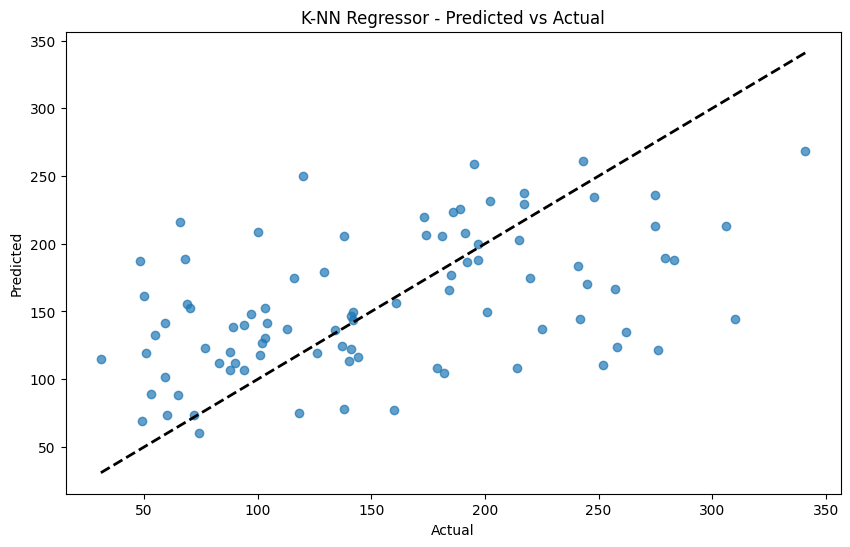

In [7]:
# 당뇨병 데이터셋 로드
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# 데이터셋 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# K-NN 회귀 모델 생성 및 학습
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = knn_reg.predict(X_test)

# 실제 값과 예측 값을 비교하는 플롯 생성
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('K-NN Regressor - Predicted vs Actual')
plt.show()

